# Imports

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set_style('darkgrid') 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LinearRegression

In [ ]:
df1 = pd.read_csv('./adult.csv')
df1.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df1.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df1.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [ ]:
df1.shape

(48842, 15)

In [ ]:
df1.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df1.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


# Data Cleaning

Fixing the common nan values:
Nan values were as ? in data. Hence we fix this with most frequent element(mode) in the entire dataset. It generalizes well, as we will see with the accuracy of our classifiers

In [ ]:
attrib, counts = np.unique(df1['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df1['workclass'][df1['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df1['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df1['occupation'][df1['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df1['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df1['native-country'][df1['native-country'] == '?'] = most_freq_attrib 

<ipython-input-156-5643d95a1a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['workclass'][df1['workclass'] == '?'] = most_freq_attrib
<ipython-input-156-5643d95a1a92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupation'][df1['occupation'] == '?'] = most_freq_attrib
<ipython-input-156-5643d95a1a92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['native-country'][df1['native-country'] == '?'] = most_freq_attr

In [ ]:
df1.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df1['income']=df1['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
dup=df1.duplicated().any()

In [ ]:
print("Are there any duplicate Values in the data:", dup)

Are there any duplicate Values in the data: True


In [ ]:
df1=df1.drop_duplicates()
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
print('workclass',df1.workclass.unique())
print('education',df1["education"].unique())
print('education-num',df1["educational-num"].unique())
print('marital-status',df1['marital-status'].unique())
print('occupation',df1.occupation.unique())
print('relationship',df1.relationship.unique())
print('race',df1.race.unique())
print('gender',df1.gender.unique())
print('native-country',df1['native-country'].unique())
print('income',df1.income.unique())

workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
education-num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dom

Age

In [ ]:
df1.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


In [ ]:
df1['education'].replace('Preschool', 'dropout',inplace=True)
df1['education'].replace('10th', 'dropout',inplace=True)
df1['education'].replace('11th', 'dropout',inplace=True)
df1['education'].replace('12th', 'dropout',inplace=True)
df1['education'].replace('1st-4th', 'dropout',inplace=True)
df1['education'].replace('5th-6th', 'dropout',inplace=True)
df1['education'].replace('7th-8th', 'dropout',inplace=True)
df1['education'].replace('9th', 'dropout',inplace=True)
df1['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df1['education'].replace('HS-grad', 'HighGrad',inplace=True)
df1['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df1['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df1['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df1['education'].replace('Bachelors', 'Bachelors',inplace=True)
df1['education'].replace('Masters', 'Masters',inplace=True)
df1['education'].replace('Prof-school', 'Masters',inplace=True)
df1['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
df1[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
2,Doctorate,16.000000
4,Masters,14.238968
0,Bachelors,13.000000
1,CommunityCollege,10.362322
3,HighGrad,9.000000
5,dropout,5.617440


In [ ]:
df1['native-country'].replace('Canada', 'North America',inplace=True)
df1['native-country'].replace('Cuba', 'North America',inplace=True)
df1['native-country'].replace('Dominican-Republic', 'North America',inplace=True)
df1['native-country'].replace('El-Salvador', 'North America',inplace=True)
df1['native-country'].replace('Guatemala', 'North America',inplace=True)
df1['native-country'].replace('Haiti', 'North America',inplace=True)
df1['native-country'].replace('Honduras', 'North America',inplace=True)
df1['native-country'].replace('Jamaica', 'North America',inplace=True)
df1['native-country'].replace('Mexico', 'North America',inplace=True)
df1['native-country'].replace('Nicaragua', 'North America',inplace=True)
df1['native-country'].replace('Outlying-US(Guam-USVI-etc)', 'North America',inplace=True)
df1['native-country'].replace('Puerto-Rico', 'North America',inplace=True)
df1['native-country'].replace('Trinadad&Tobago', 'North America',inplace=True)
df1['native-country'].replace('United-States', 'North America',inplace=True)

df1['native-country'].replace('Cambodia', 'Asia',inplace=True)
df1['native-country'].replace('China', 'Asia',inplace=True)
df1['native-country'].replace('Hong', 'Asia',inplace=True)
df1['native-country'].replace('India', 'Asia',inplace=True)
df1['native-country'].replace('Iran', 'Asia',inplace=True)
df1['native-country'].replace('Japan', 'Asia',inplace=True)
df1['native-country'].replace('Laos', 'Asia',inplace=True)
df1['native-country'].replace('Philippines', 'Asia',inplace=True)
df1['native-country'].replace('Taiwan', 'Asia',inplace=True)
df1['native-country'].replace('Thailand', 'Asia',inplace=True)
df1['native-country'].replace('Vietnam', 'Asia',inplace=True)

df1['native-country'].replace('Columbia', 'South America',inplace=True)
df1['native-country'].replace('Ecuador', 'South America',inplace=True)
df1['native-country'].replace('Peru', 'South America',inplace=True)

df1['native-country'].replace('England', 'Europe',inplace=True)
df1['native-country'].replace('France', 'Europe',inplace=True)
df1['native-country'].replace('Germany', 'Europe',inplace=True)
df1['native-country'].replace('Greece', 'Europe',inplace=True)
df1['native-country'].replace('Holand-Netherlands', 'Europe',inplace=True)
df1['native-country'].replace('Hungary', 'Europe',inplace=True)
df1['native-country'].replace('Ireland', 'Europe',inplace=True)
df1['native-country'].replace('Italy', 'Europe',inplace=True)
df1['native-country'].replace('Poland', 'Europe',inplace=True)
df1['native-country'].replace('Portugal', 'Europe',inplace=True)
df1['native-country'].replace('Scotland', 'Europe',inplace=True)
df1['native-country'].replace('Yugoslavia', 'Europe',inplace=True)

df1['native-country'].replace('South', 'Other',inplace=True)
df1['native-country'].replace('?', 'Other',inplace=True)

In [ ]:
df1['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df1['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df1['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df1['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df1['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df1['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df1['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [ ]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=df1)

In [ ]:
sns.histplot(data=df1, x="age", binwidth=3, kde=True, color='purple', bins=10)

Workclass

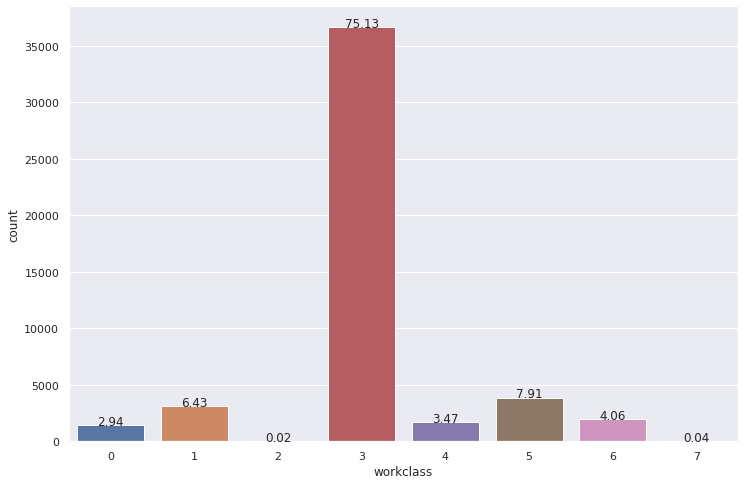

In [ ]:
plt.figure(figsize=(12,8))

total = float(len(df1["income"]) )

ax = sns.countplot(x="workclass", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Fnlwght

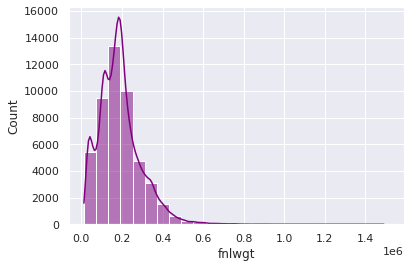

In [ ]:
sns.histplot(data=df1, x="fnlwgt", binwidth=60000, kde=True, color='purple', bins=10)

education

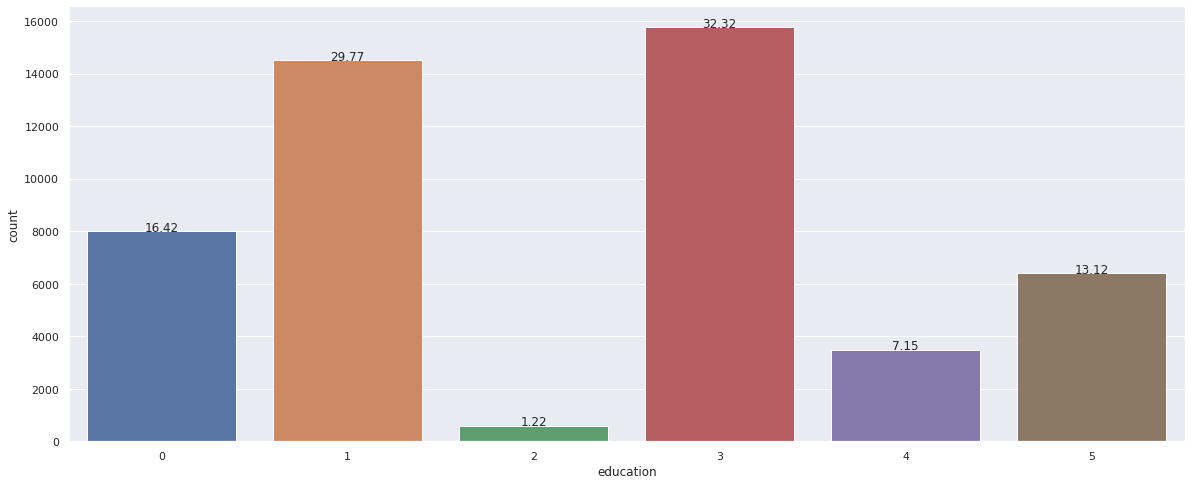

In [ ]:
plt.figure(figsize=(20,8))

total = float(len(df1["education"]) )

ax = sns.countplot(x="education", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

income

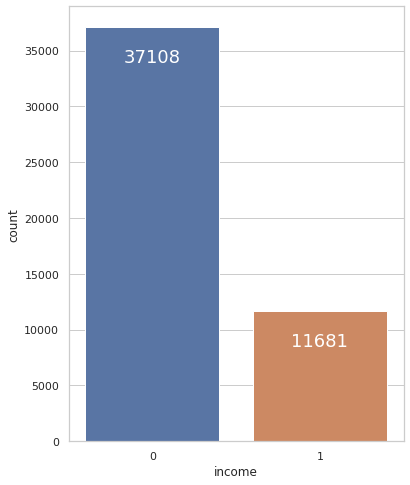

In [ ]:
fig = plt.figure(figsize=(6,8))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df1["income"])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

There are 16 unique categories present in the education attribute.
Hs-grad has 32.32% of all the education attribute.
HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
Pre-school has minimum samples i.e. 83.

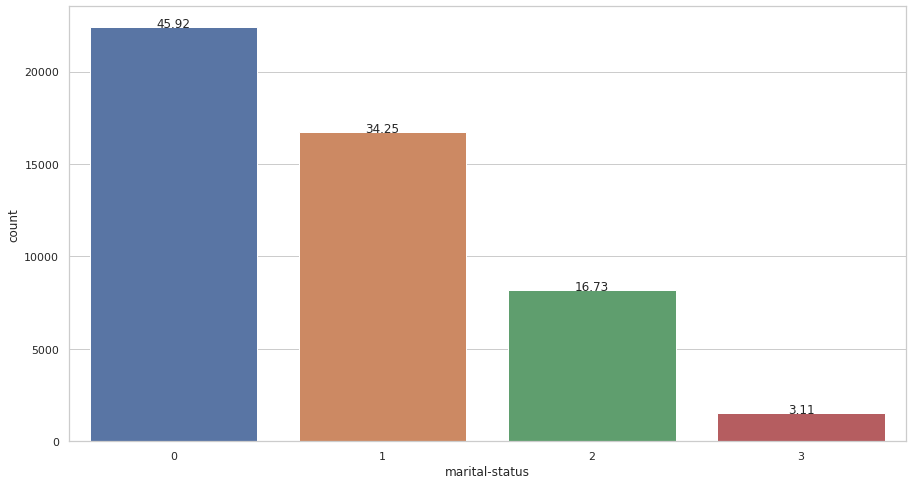

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df1) )

ax = sns.countplot(x="marital-status", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This marital-status attribute has 7 unique categories.
Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
Married-civ-spouse has maximum number of samples.
Married-AF-spouse has minimum number of obs.

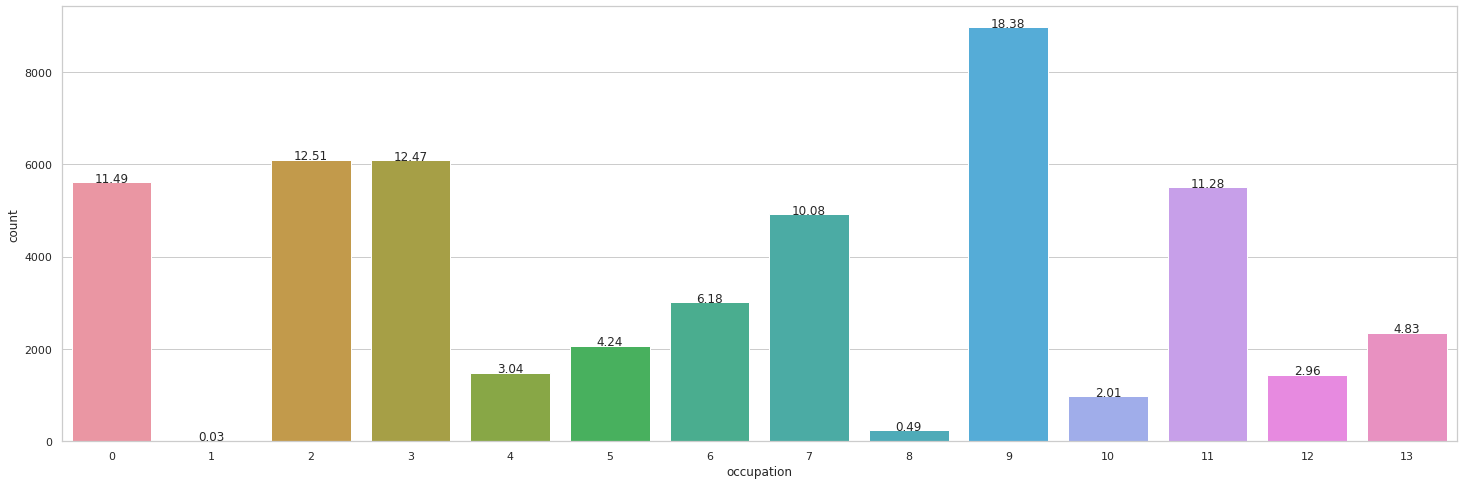

In [ ]:
plt.figure(figsize=(25,8))
total = float(len(df1) )

ax = sns.countplot(x="occupation", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 14 unique categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces has minimum samples in the occupation attribute.

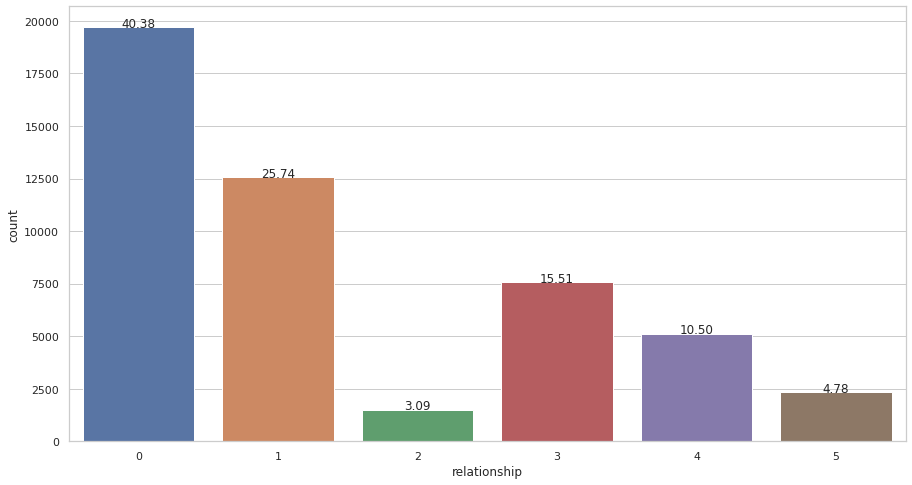

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df1) )

ax = sns.countplot(x="relationship", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 6 unique categories in the relationship attribute.
Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

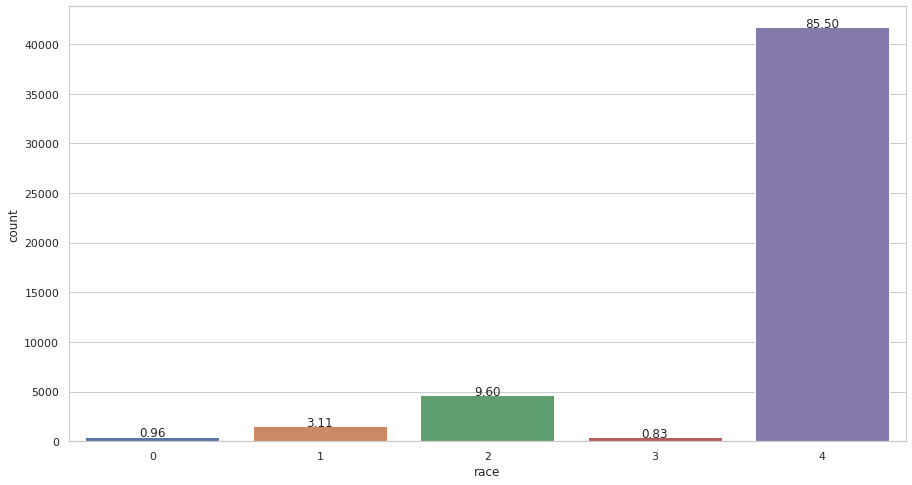

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df1) )

ax = sns.countplot(x="race", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

There are 5 unique categories in the race attribute.
Most of them are "white" which is roughly 85.50%.
This dataset is totally bias toward the "white" race.
Second major race in the dataset is the "black" with just 9.59%.

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df1) )

ax = sns.countplot(x="gender", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

Gender has 2 unique categories(male and female).
But the frequency of male(32650) is higher than the female(16192) categories.
Distribution shows that this dataset is skewed toward the male with nearly 67%.

In [ ]:
plt.figure(figsize=(28,8))
total = float(len(df1) )

ax = sns.countplot(y="native-country", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:

This dataset is taken from the US.
As 91.5% of them have native country America and others are immigrants.

In [ ]:
df1.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,dropout,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,North America,0
1,38,Private,89814,HighGrad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,North America,0
2,28,Local-gov,336951,CommunityCollege,12,Married,Protective-serv,Husband,White,Male,0,0,40,North America,1
3,44,Private,160323,CommunityCollege,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,North America,1
4,18,Private,103497,CommunityCollege,10,NotMarried,Prof-specialty,Own-child,White,Female,0,0,30,North America,0
5,34,Private,198693,dropout,6,NotMarried,Other-service,Not-in-family,White,Male,0,0,30,North America,0
6,29,Private,227026,HighGrad,9,NotMarried,Prof-specialty,Unmarried,Black,Male,0,0,40,North America,0
7,63,Self-emp-not-inc,104626,Masters,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,North America,1
8,24,Private,369667,CommunityCollege,10,NotMarried,Other-service,Unmarried,White,Female,0,0,40,North America,0
9,55,Private,104996,dropout,4,Married,Craft-repair,Husband,White,Male,0,0,10,North America,0


In [ ]:
sns.pairplot(df1)

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(df1, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

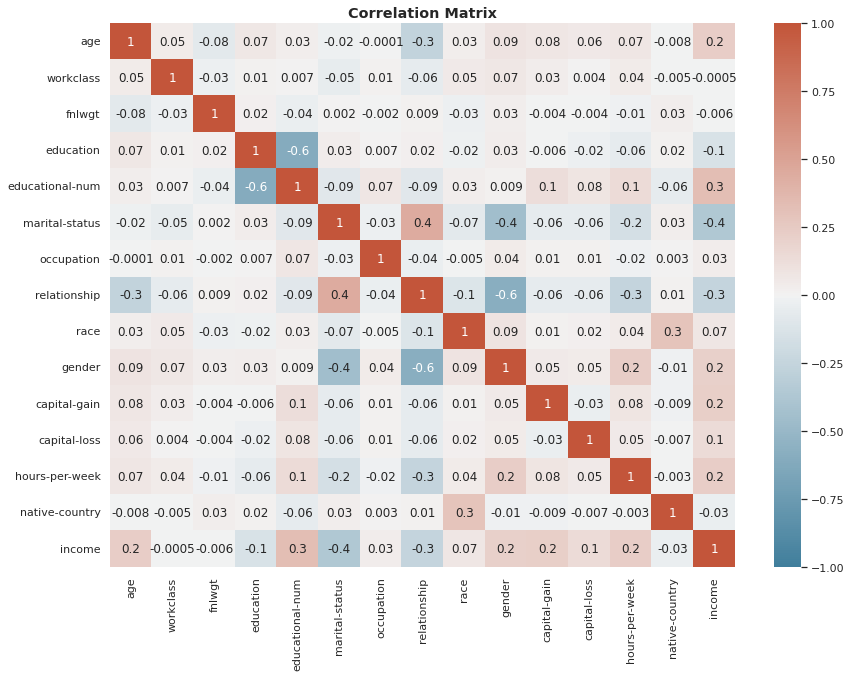

In [ ]:
corr = df1.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')
plt.show()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df1.select_dtypes(include=numerics)
l = newdf.columns.values
len(l)

7

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (12,10))
a=0
for name in l:
    i,j = divmod(a, 4)
    sns.boxplot(y = newdf[name], ax = axes[i,j], color='green', showfliers=True)
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1   

plt.tight_layout()
plt.show()

# Label Encoding

In [ ]:
df1.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,dropout,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,North America,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of the LabelEncoder class
le = LabelEncoder()

df1['workclass'] = le.fit_transform(df1['workclass'])
df1['education'] = le.fit_transform(df1['education'])
df1['marital-status'] = le.fit_transform(df1['marital-status'])
df1['occupation'] = le.fit_transform(df1['occupation'])
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['race'] = le.fit_transform(df1['race'])
df1['gender'] = le.fit_transform(df1['gender'])
df1['native-country'] = le.fit_transform(df1['native-country'])

# Box Plots

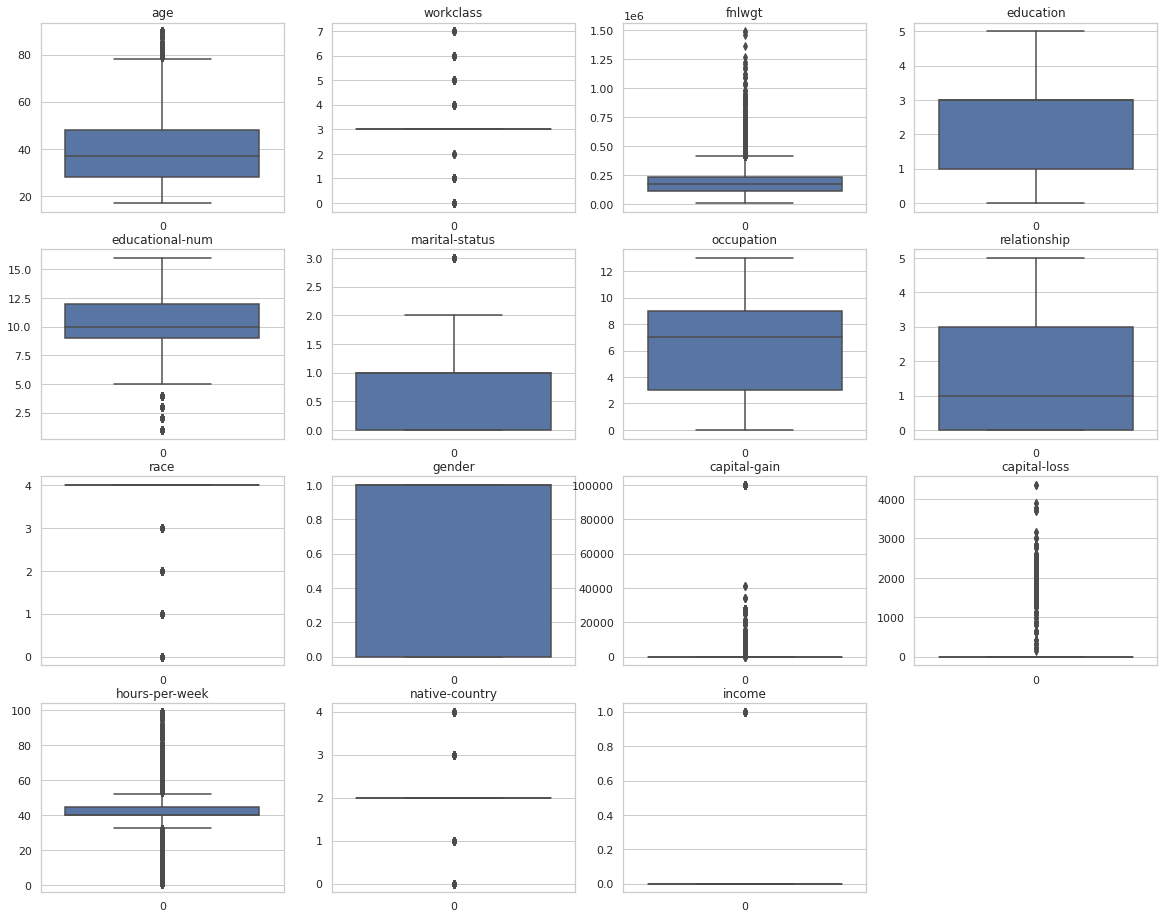

In [ ]:
# plt.figure(figsize=(20,16))
# for i in range(len(df1.columns)):
#     plt.subplot(4,4,i+1)
#     sns.boxplot(data = df1[df1.columns[i]])
#     plt.title(df1.columns[i])
# plt.show()

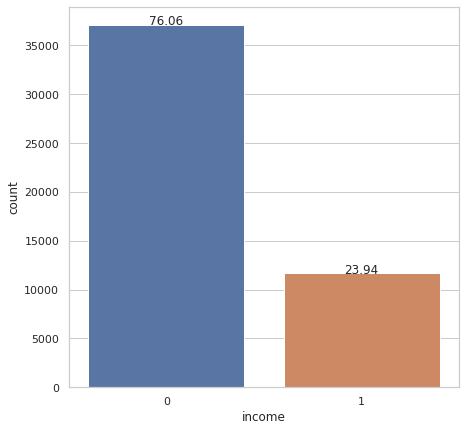

In [ ]:
plt.figure(figsize=(7,7))
total = float(len(df1) )

ax = sns.countplot(x="income", data=df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Copy dataframe

In [ ]:
df = df1.copy()

In [ ]:
y = df['income'].values
X = df.drop('income', axis=1).values

# Outlier detection

In [ ]:
def get_outlier_counts(df, treshold):
    df = df.copy()
    #Get z-score for specified treshold. shitft and scale, ne kadar mean den uzaklar ı hesaplarız.
    treshold_z_score = stats.norm.ppf(treshold) #norm distribution. ppf: percent point funct. scipy içindfe bir istatik func. cdf nin tersi

    #get the z-scores for each value in track 
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    #compare df z-scores to the treshold, Return the count of outliers in each column
    return (z_score_df > treshold_z_score).sum(axis=0)

In [ ]:
get_outlier_counts(df , 0.999993)

age                   0
workclass             0
fnlwgt              151
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain        253
capital-loss       1479
hours-per-week      164
native-country     1156
income                0
dtype: int64

In [ ]:
def remove_outliers(df, treshold):

    df1 = df.copy()
	
    #Get z-score for specified treshold
    treshold_z_score = stats.norm.ppf(treshold)

    #get the z-scores for each value in track and compare them to the treshold
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df1)), columns=df1.columns)
    z_score_df["native-country"] = treshold_z_score  # treshold is not needed for native countries

    z_score_df = z_score_df > treshold_z_score
    # Get indicies of outliers
    outliers = z_score_df.sum(axis=1) # her rowdaki outliers toplamı
    outliers = outliers > 0

    outliers_indicies = df1.index[outliers]

    #Drop outliers
    df = df.drop(outliers_indicies, axis=0).reset_index(drop=True)

    return df

In [ ]:
df = remove_outliers(df, 0.999993)

## Model test-train-scale-predict

In [ ]:
from sklearn.model_selection import train_test_split
y = df['income'].values
X = df.drop('income', axis=1).values

# Sampling

Combining oversampling and undersampling: This method involves applying both oversampling and undersampling techniques to the dataset. One of the most common techniques for combining oversampling and undersampling is called SMOTE + Tomek links. the SMOTE technique to our imbalanced dataset using the imblearn library in Python

Text(0, 0.5, 'Count')

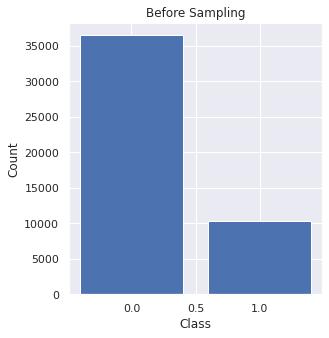

In [ ]:
# visualize the class distribution before and after the sampling
plt.figure(figsize=(10,5))
# visualize the class distribution before the sampling
plt.subplot(1, 2, 1)
plt.bar(np.unique(y), np.bincount(y))
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Count')

In [ ]:
from imblearn.over_sampling import SMOTE

# apply SMOTE to the dataset
smote = SMOTE()
X, y = smote.fit_resample(X, y)

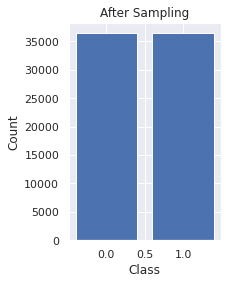

In [ ]:



# visualize the class distribution after the sampling
plt.subplot(1, 2, 2)
plt.bar(np.unique(y), np.bincount(y))
plt.title('After Sampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

## Test-Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.33, random_state=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# Logistic Regression Model

In [ ]:
import numpy as np

class MyLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

# Without any processes

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
# y = df['income'].values
# X = df.drop('income', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2)


scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# create an instance of the logistic regression classifier
clf = MyLogisticRegression()

# create and train model

# train the model on the training data
clf.fit(X_train_scaled, y_train)

# predict the class of some test data
y_pred_proba = clf.predict_prob(X_test_scaled)
y_pred = clf.predict(X_test_scaled)

# evaluate the model performance
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
# generate the classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.84730053794802
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12169
           1       0.69      0.50      0.58      3260

    accuracy                           0.85     15429
   macro avg       0.78      0.72      0.74     15429
weighted avg       0.84      0.85      0.84     15429



# PCA uygulandıktan sonra

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=11)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print(len(X_train_pca[0]))
print(X_test_pca)

print(pca.explained_variance_ratio_)


# create an instance of the logistic regression classifier
clf = MyLogisticRegression()

# train the model on the training data
clf.fit(X_train_pca, y_train)
# predict the class of some test data
y_pred_proba = clf.predict_prob(X_test_pca)
y_pred = clf.predict(X_test_pca)

# evaluate the model performance
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
# generate the classification report
print(classification_report(y_test, y_pred))



11
[[ 0.20070317  0.78861262 -0.31668614 ... -0.07763027 -0.16409021
  -0.29051266]
 [-2.49539246 -0.80355703 -0.63289435 ... -0.54080134  1.79880251
  -0.28356438]
 [ 1.42311074  0.02138012 -0.08398707 ... -0.30140252 -0.16522143
  -0.46707577]
 ...
 [ 1.74081523 -1.20867888 -0.38255113 ... -0.77891548  0.3804347
   0.047485  ]
 [-1.62628409 -1.48282103 -0.74830811 ...  1.17877008  1.95899015
   0.10050192]
 [ 1.79569413 -0.14992144 -0.18518121 ... -0.04397367 -0.27978097
   0.15246545]]
[0.16061353 0.11812254 0.09114959 0.08034721 0.07308095 0.07271356
 0.07108145 0.06854785 0.06173194 0.06081409 0.04938291]
Accuracy:  0.8376433987944779
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12169
           1       0.69      0.42      0.52      3260

    accuracy                           0.84     15429
   macro avg       0.77      0.69      0.71     15429
weighted avg       0.82      0.84      0.82     15429



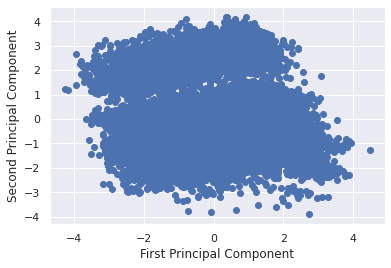

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

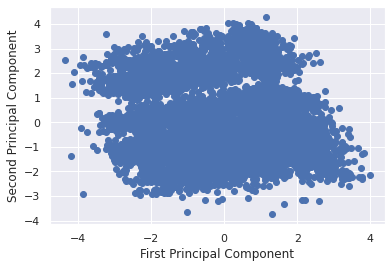

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Other Classification Methods

In [ ]:
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)



# from sklearn.decomposition import PCA

# # Create an instance of the PCA class
# pca = PCA(n_components=10)

# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)


# define the models to be used
models = {
    "LGBM Classifier": LGBMClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}


# train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    # predict the probability of the positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    print(f"{name} Auc curve:")
    plot_roc_curve(model, X_test, y_test)
    plt.show()

    # evaluate the model performance
    from sklearn.metrics import accuracy_score
    print(f"{name} Classification Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


LGBM Classifier Classification Accuracy: 0.8974796206953918
LGBM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12070
           1       0.90      0.90      0.90     11974

    accuracy                           0.90     24044
   macro avg       0.90      0.90      0.90     24044
weighted avg       0.90      0.90      0.90     24044



XGBoost Classifier Classification Accuracy: 0.8802611878223258
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     12070
           1       0.87      0.90      0.88     11974

    accuracy                           0.88     24044
   macro avg       0.88      0.88      0.88     24044
weighted avg       0.88      0.88      0.88     24044



Decision Tree Classification Accuracy: 0.8511894859424388
Decision Tree Classification Report:
              precision    recall  f1-score

# Ensemble 

In [ ]:
from sklearn.ensemble import VotingClassifier

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# create an instance of the LGBM classifier
lgbm = LGBMClassifier()

# create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# create an instance of the SVM classifier
svm = SVC(probability=True)

# create an ensemble model using the voting classifier
ensemble = VotingClassifier(estimators=[('lgbm', lgbm), ('rf', rf), ('svm', svm)], voting='soft')

# fit the ensemble model to the training data
ensemble.fit(X_train, y_train)

# predict the class labels for the test data
y_pred = ensemble.predict(X_test)

# evaluate the ensemble model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8972716686075528
